In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("chemical_oil_carriers.csv")

In [3]:
df.head()

,Name,Type,BuildYear,LOA,LBP,Beam,Draught,Dwt,CubicCapacity
0,Cosmic 11,Chemical & Oil Carrier,1985,64.72,60.0,10.70,3.60,1016,1077.0
1,Manolis I,Chemical & Oil Carrier,1975,60.13,55.0,10.00,4.00,1016,1150.0
2,Julie Marine,Chemical & Oil Carrier,1985,64.08,60.0,10.00,4.24,1032,938.0
3,Fateha,Chemical & Oil Carrier,1985,61.50,59.0,9.80,4.00,1050,932.0
4,Agamemnon,Chemical & Oil Carrier,1968,63.95,58.6,9.68,3.85,1061,1267.0


In [4]:
df=df.dropna()

In [5]:
df.describe()

,BuildYear,LOA,LBP,Beam,Draught,Dwt,CubicCapacity
count,3807.000000,3807.000000,3807.000000,3807.000000,3807.000000,3807.000000,3807.000000
mean,2001.692409,138.062450,130.255743,22.392859,8.864561,21035.314158,22878.973470
std,9.126984,37.520704,36.731042,6.847156,2.568554,17143.575702,18662.661471
min,1964.000000,57.500000,53.300000,6.600000,2.260000,1016.000000,588.000000
25%,1998.000000,108.015000,100.190000,16.900000,6.770000,6711.500000,7322.000000
50%,2005.000000,135.600000,127.000000,20.800000,8.750000,13946.000000,15326.000000
75%,2008.000000,180.000000,172.000000,27.700000,11.200000,37333.000000,41308.000000
max,2012.000000,229.111000,222.210000,42.000000,16.096000,104831.000000,120669.000000


<AxesSubplot:xlabel='Dwt', ylabel='LOA'>

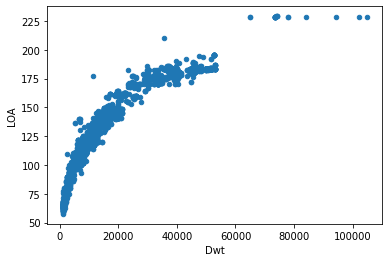

In [6]:
df.plot.scatter(x='Dwt',y='LOA')

In [7]:
dwt_train, dwt_test, loa_train, loa_test = train_test_split(df['Dwt'],df['LOA'])

In [8]:
dwt_train

1718    12100
1010     6704
3037    37690
2655    25998
1890    13019
        ...  
162      1550
3685    50100
2849    36032
3019    37518
1301     8241
Name: Dwt, Length: 2855, dtype: int64

In [9]:
loa_train

1718    124.00
1010    107.65
3037    184.33
2655    169.90
1890    128.60
         ...  
162      80.00
3685    183.00
2849    183.00
3019    183.10
1301    116.90
Name: LOA, Length: 2855, dtype: float64

1. Use Linear Regression to fit LOA vs DWT

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr=LinearRegression(normalize=True)

In [12]:
from numpy import reshape

In [13]:
dwt_train=dwt_train.values.reshape(-1,1)

In [14]:
dwt_loa_fit=lr.fit(dwt_train, loa_train)

C:\Users\weeyang.kee\Anaconda3\envs\R\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [15]:
dwt_loa_fit.score(dwt_train, loa_train)

0.8706425239661227

In [16]:
dwt_loa_fit.coef_

array([0.00203769])

In [17]:
dwt_loa_fit.intercept_

95.44507768779603

In [18]:
dwt_test=dwt_test.values.reshape(-1,1)

In [19]:
loa_pred=lr.predict(dwt_test)

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
mean_squared_error(loa_test,loa_pred)

166.62199750589363

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
print(cross_val_score(lr,dwt_train,loa_train,cv=10))

[0.86873422 0.88175317 0.88061626 0.87542494 0.86601266 0.87010176
 0.86470609 0.88345926 0.84968054 0.86067868]


C:\Users\weeyang.kee\Anaconda3\envs\R\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\weeyang.kee\Anaconda3\envs\R\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline imp

2. Use PolynomialFeatures to fit LOA vs DWT

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
poly=PolynomialFeatures(3)

In [26]:
dwt_train_poly=poly.fit_transform(dwt_train)

In [27]:
dwt_loa_fit_poly=lr.fit(dwt_train_poly, loa_train)

C:\Users\weeyang.kee\Anaconda3\envs\R\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [28]:
dwt_loa_fit_poly.score(dwt_train_poly, loa_train)

0.9700310113837376

In [29]:
dwt_loa_fit_poly.coef_

array([ 0.00000000e+00,  6.08609484e-03, -1.09347832e-07,  6.82213232e-13])

In [30]:
dwt_loa_fit_poly.intercept_

69.09064404843113

In [31]:
dwt_test_poly=poly.fit_transform(dwt_test)

In [32]:
loa_pred_poly=lr.predict(dwt_test_poly)

In [33]:
mean_squared_error(loa_test,loa_pred_poly)

40.55327888147016

In [34]:
print(cross_val_score(lr,dwt_train_poly,loa_train,cv=10))

C:\Users\weeyang.kee\Anaconda3\envs\R\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\weeyang.kee\Anaconda3\envs\R\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline imp

[0.9668717  0.97941411 0.96760553 0.9579444  0.97632349 0.96447756
 0.96695912 0.96299363 0.96685918 0.97282052]


C:\Users\weeyang.kee\Anaconda3\envs\R\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\weeyang.kee\Anaconda3\envs\R\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline imp

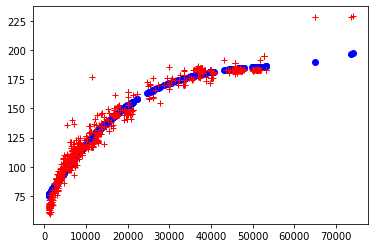

In [35]:
plot.plot(dwt_test,loa_pred_poly,'bo')
plot.plot(dwt_test,loa_test,'r+')

In [36]:
from scipy.sparse import issparse

3. Use Spline to fit LOA vs DWT

In [37]:
import sklearn.preprocessing as preprocessing

In [38]:
from sklearn.preprocessing import SplineTransformer

In [39]:
spline=SplineTransformer(degree=3,n_knots=2)
dwt_train_spline=spline.fit_transform(dwt_train)

In [40]:
dwt_loa_fit_spline=lr.fit(dwt_train_spline, loa_train)

C:\Users\weeyang.kee\Anaconda3\envs\R\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [41]:
dwt_loa_fit_spline.score(dwt_train_spline, loa_train)

0.970077063562042

In [42]:
dwt_loa_fit_spline.coef_

array([1.56097765e+15, 1.56097765e+15, 1.56097765e+15, 1.56097765e+15])

In [43]:
dwt_loa_fit_poly.intercept_

-1560977652294944.0

In [44]:
dwt_test_spline=spline.fit_transform(dwt_test)

In [45]:
loa_pred_spline=lr.predict(dwt_test_spline)

In [46]:
mean_squared_error(loa_test,loa_pred_spline)

166.9558945829832

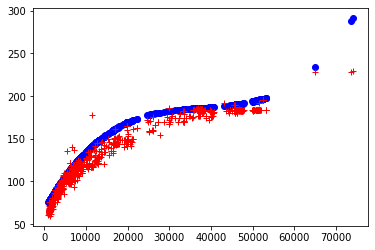

In [47]:
plot.plot(dwt_test,loa_pred_spline,'bo')
plot.plot(dwt_test,loa_test,'r+')

4. Use kNN to fit LOA vs DWT

In [48]:
from sklearn import neighbors

In [49]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(dwt_train,loa_train)
model.best_params_

{'n_neighbors': 9}

In [50]:
knn=neighbors.KNeighborsRegressor(n_neighbors=8)

In [51]:
dwt_loa_fit_knn=knn.fit(dwt_train,loa_train)

In [52]:
dwt_loa_fit_knn.score(dwt_train, loa_train)

0.9892178877288339

In [53]:
loa_pred_knn=knn.predict(dwt_test)

In [54]:
mean_squared_error(loa_test,loa_pred_knn)

22.912487414784664

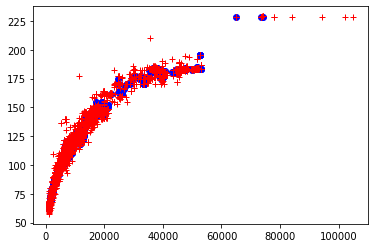

In [55]:
plot.plot(dwt_test,loa_pred_knn,'bo')
plot.plot(dwt_test,loa_test,'r+')
plot.plot(dwt_train,loa_train,'r+')

In [56]:
dwttopredict=np.array([20000,30000,40000,45000,50000,55000,60000,65000,70000,75000,80000,85000,90000,95000,100000,105000])

In [57]:
loapredicted=knn.predict(dwttopredict.reshape(-1,1))

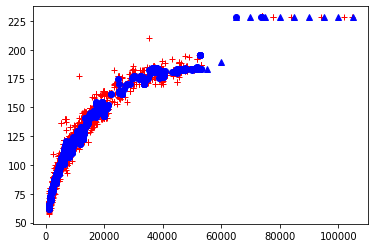

In [58]:
plot.plot(dwt_test,loa_test,'r+')
plot.plot(dwt_train,loa_train,'r+')
plot.plot(dwt_test,loa_pred_knn,'bo')
plot.plot(dwttopredict,loapredicted,'b^')

5. Use SVM to fit LOA vs DWT

In [59]:
from sklearn.svm import SVR

In [60]:
svr=SVR(kernel='rbf')

In [61]:
dwt_loa_fit_svm=svr.fit(dwt_train,loa_train)

In [62]:
dwt_loa_fit_svm.score(dwt_train, loa_train)

0.9509536349074617

In [63]:
loa_pred_svm=svr.predict(dwt_test)

In [64]:
mean_squared_error(loa_test,loa_pred_svm)

54.68785253837766

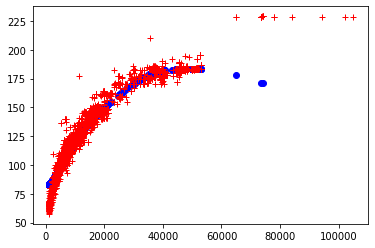

In [65]:
plot.plot(dwt_test,loa_pred_svm,'bo')
plot.plot(dwt_test,loa_test,'r+')
plot.plot(dwt_train,loa_train,'r+')

In [66]:
dwttopredict=np.array([20000,30000,40000,80000,100000])
loapredicted=svr.predict(dwttopredict.reshape(-1,1))

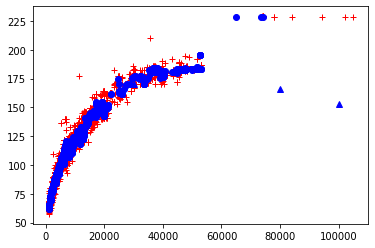

In [67]:
plot.plot(dwt_test,loa_test,'r+')
plot.plot(dwt_train,loa_train,'r+')
plot.plot(dwt_test,loa_pred_knn,'bo')
plot.plot(dwttopredict,loapredicted,'b^')

6. Use kNN to fit Beam vs DWT

<AxesSubplot:xlabel='Dwt', ylabel='Beam'>

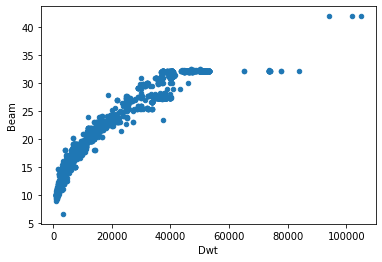

In [68]:
df.plot.scatter(x='Dwt',y='Beam')

In [69]:
dwt_train, dwt_test, beam_train, beam_test=train_test_split(df['Dwt'],df['Beam'])

In [70]:
dwt_train=dwt_train.values.reshape(-1,1)
beam_train=beam_train.values.reshape(-1,1)

In [71]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(dwt_train,beam_train)
model.best_params_

{'n_neighbors': 3}

In [72]:
knn2=neighbors.KNeighborsRegressor(n_neighbors=6)

In [73]:
dwt_beam_fit_knn=knn2.fit(dwt_train,beam_train)

In [74]:
dwt_beam_fit_knn.score(dwt_train, beam_train)

0.9890972931909342

In [75]:
dwt_test=dwt_test.values.reshape(-1,1)

In [76]:
beam_pred_knn=knn2.predict(dwt_test)

In [77]:
mean_squared_error(beam_test,beam_pred_knn)

0.7508287554271711

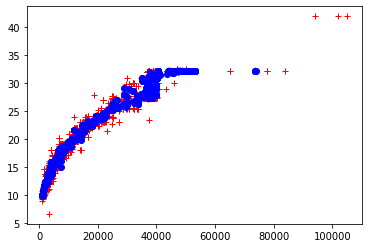

In [78]:
plot.plot(dwt_test,beam_test,'r+')
plot.plot(dwt_train,beam_train,'r+')
plot.plot(dwt_test,beam_pred_knn,'bo')

In [79]:
dwttopredict=np.array([20000,30000,40000,45000,50000,55000,60000,65000,70000,75000,80000,85000,90000,95000,100000,105000])
beampredicted=knn2.predict(dwttopredict.reshape(-1,1))

In [83]:
dwttopredict

array([ 20000,  30000,  40000,  45000,  50000,  55000,  60000,  65000,
        70000,  75000,  80000,  85000,  90000,  95000, 100000, 105000])

In [84]:
beampredicted

array([[24.12166667],
       [26.61666667],
       [29.225     ],
       [32.2       ],
       [32.221     ],
       [32.2       ],
       [32.2       ],
       [32.24516667],
       [32.26516667],
       [32.25      ],
       [32.24333333],
       [33.87      ],
       [37.12333333],
       [37.12333333],
       [37.12333333],
       [37.12333333]])

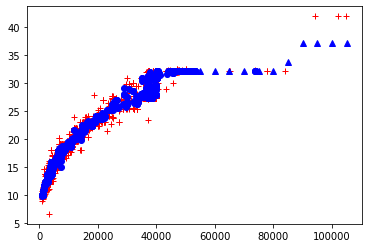

In [80]:
plot.plot(dwt_test,beam_test,'r+')
plot.plot(dwt_train,beam_train,'r+')
plot.plot(dwt_test,beam_pred_knn,'bo')
plot.plot(dwttopredict,beampredicted,'b^')

7. Use kNN to predict Draught vs Dwt

<AxesSubplot:xlabel='Dwt', ylabel='Draught'>

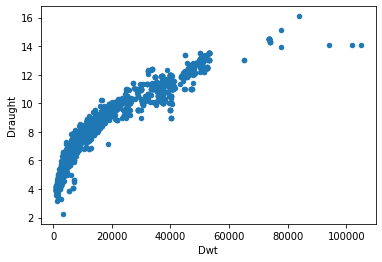

In [85]:
df.plot.scatter(x='Dwt',y='Draught')

In [89]:
dwt_train, dwt_test, draught_train, draught_test=train_test_split(df['Dwt'],df['Draught'])

In [90]:
dwt_train=dwt_train.values.reshape(-1,1)
draught_train=draught_train.values.reshape(-1,1)

In [91]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(dwt_train,draught_train)
model.best_params_

{'n_neighbors': 9}

In [92]:
knn3=neighbors.KNeighborsRegressor(n_neighbors=9)

In [93]:
dwt_draught_fit_knn=knn3.fit(dwt_train,draught_train)

In [94]:
dwt_draught_fit_knn.score(dwt_train, draught_train)

0.9832960229130155

In [95]:
dwt_test=dwt_test.values.reshape(-1,1)

In [97]:
draught_pred_knn=knn3.predict(dwt_test)

In [98]:
mean_squared_error(draught_test,draught_pred_knn)

0.1262654493690995

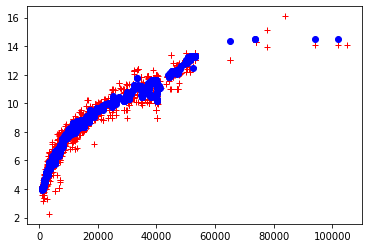

In [99]:
plot.plot(dwt_test,draught_test,'r+')
plot.plot(dwt_train,draught_train,'r+')
plot.plot(dwt_test,draught_pred_knn,'bo')

In [100]:
dwttopredict=np.array([20000,30000,40000,45000,50000,55000,60000,65000,70000,75000,80000,85000,90000,95000,100000,105000])
draughtpredicted=knn3.predict(dwttopredict.reshape(-1,1))

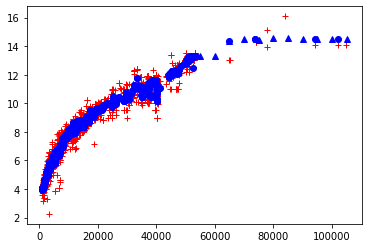

In [101]:
plot.plot(dwt_test,draught_test,'r+')
plot.plot(dwt_train,draught_train,'r+')
plot.plot(dwt_test,draught_pred_knn,'bo')
plot.plot(dwttopredict,draughtpredicted,'b^')